# Answer1

In [1]:
#import libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://drive.google.com/uc?id=1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2'
df = pd.read_csv(url)

# Display basic statistics
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

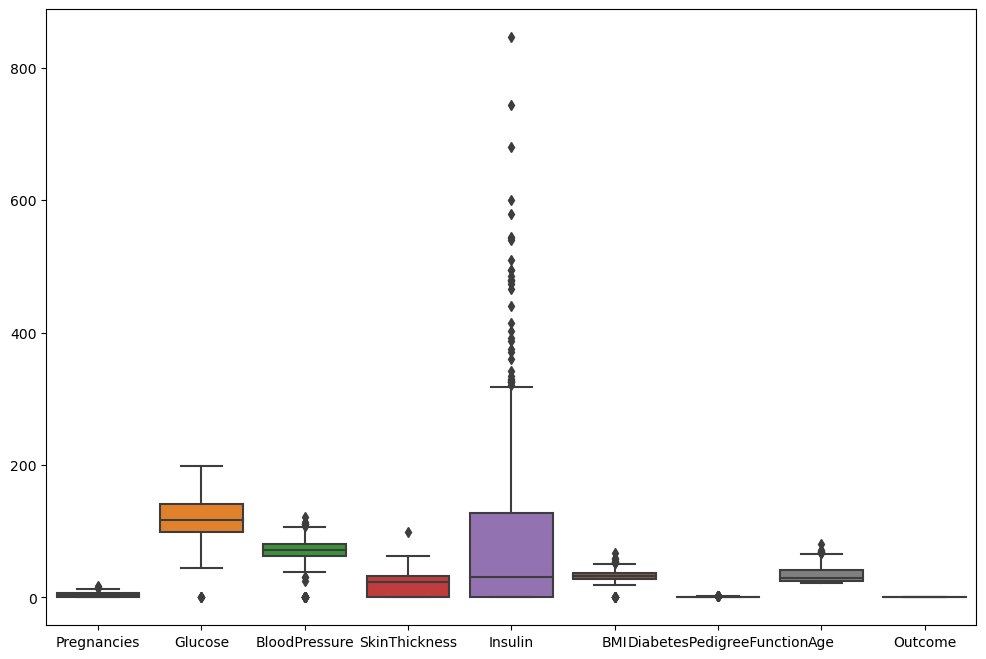

In [13]:
# Visualize data distribution using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

# Answer2

In [8]:
# Handle missing values
df.dropna(inplace=True)

In [9]:
# Remove outliers
from scipy.stats import zscore

# Calculate Z-scores for each column
z_scores = zscore(df)

# Define a threshold for Z-scores
threshold = 3

# Identify and remove outliers
df = df[(abs(z_scores) < threshold).all(axis=1)]

# Answer3

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Answer4

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Initialize the decision tree model
dt_model = DecisionTreeClassifier()

# Cross-validation to optimize hyperparameters
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)

# Train the model on the entire training set
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

# Answer5

Accuracy: 0.72
Precision: 0.68
Recall: 0.53
F1 Score: 0.60

Confusion Matrix:
[[72 13]
 [25 28]]


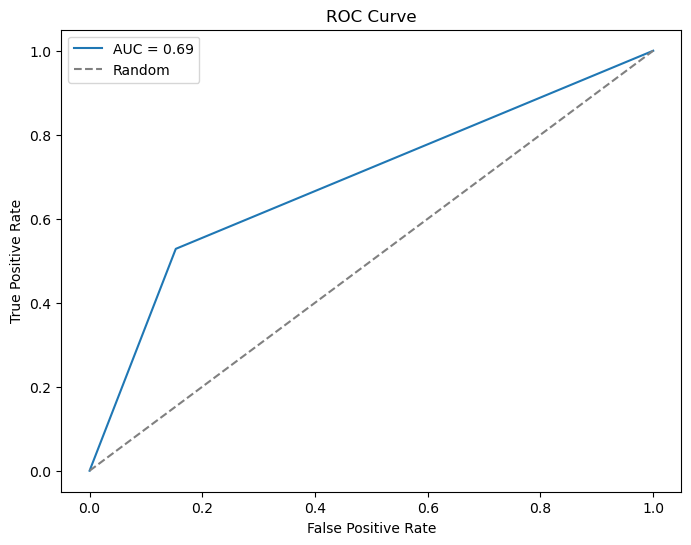

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve and AUC
y_probs = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Display metrics and visualizations
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Answer6
Interpret the decision tree:

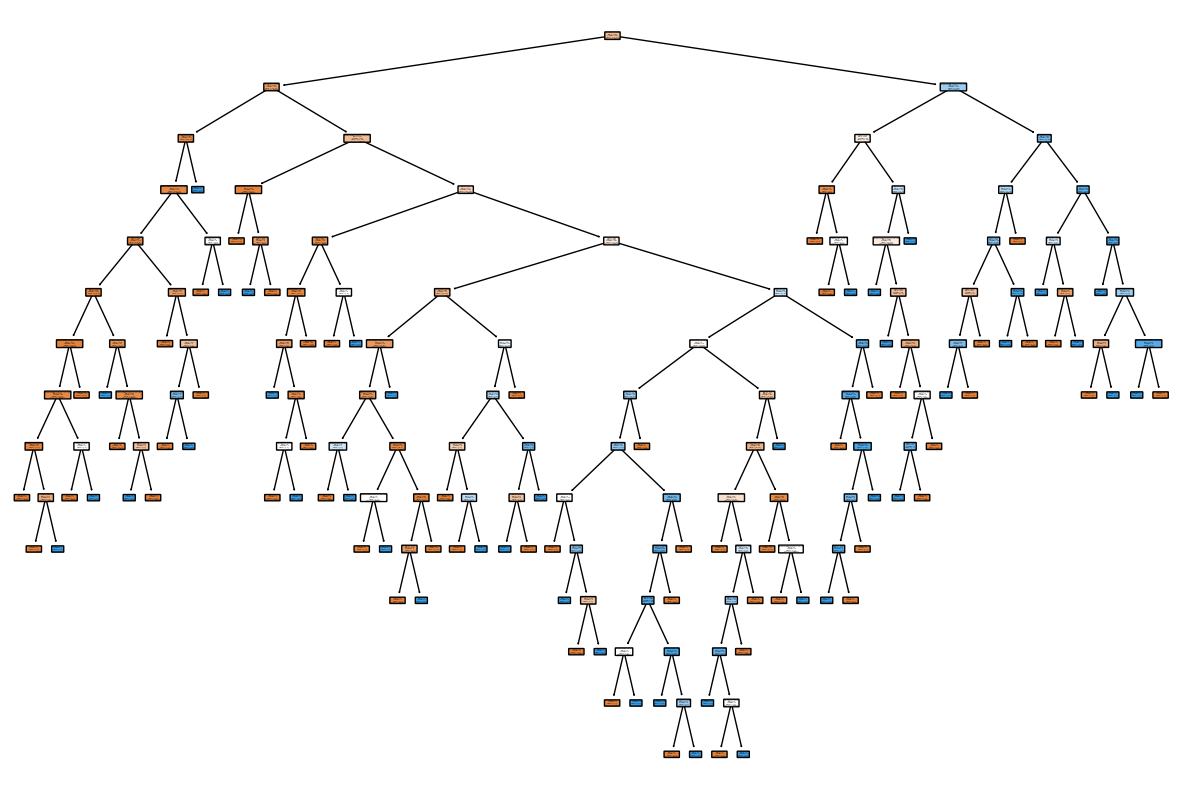

In [14]:
from sklearn.tree import plot_tree

# Display the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True, rounded=True)
plt.show()